In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

✓ Visualization 6 saved: visualizations/visualization_media/viz_06_control_variables_scatter.png


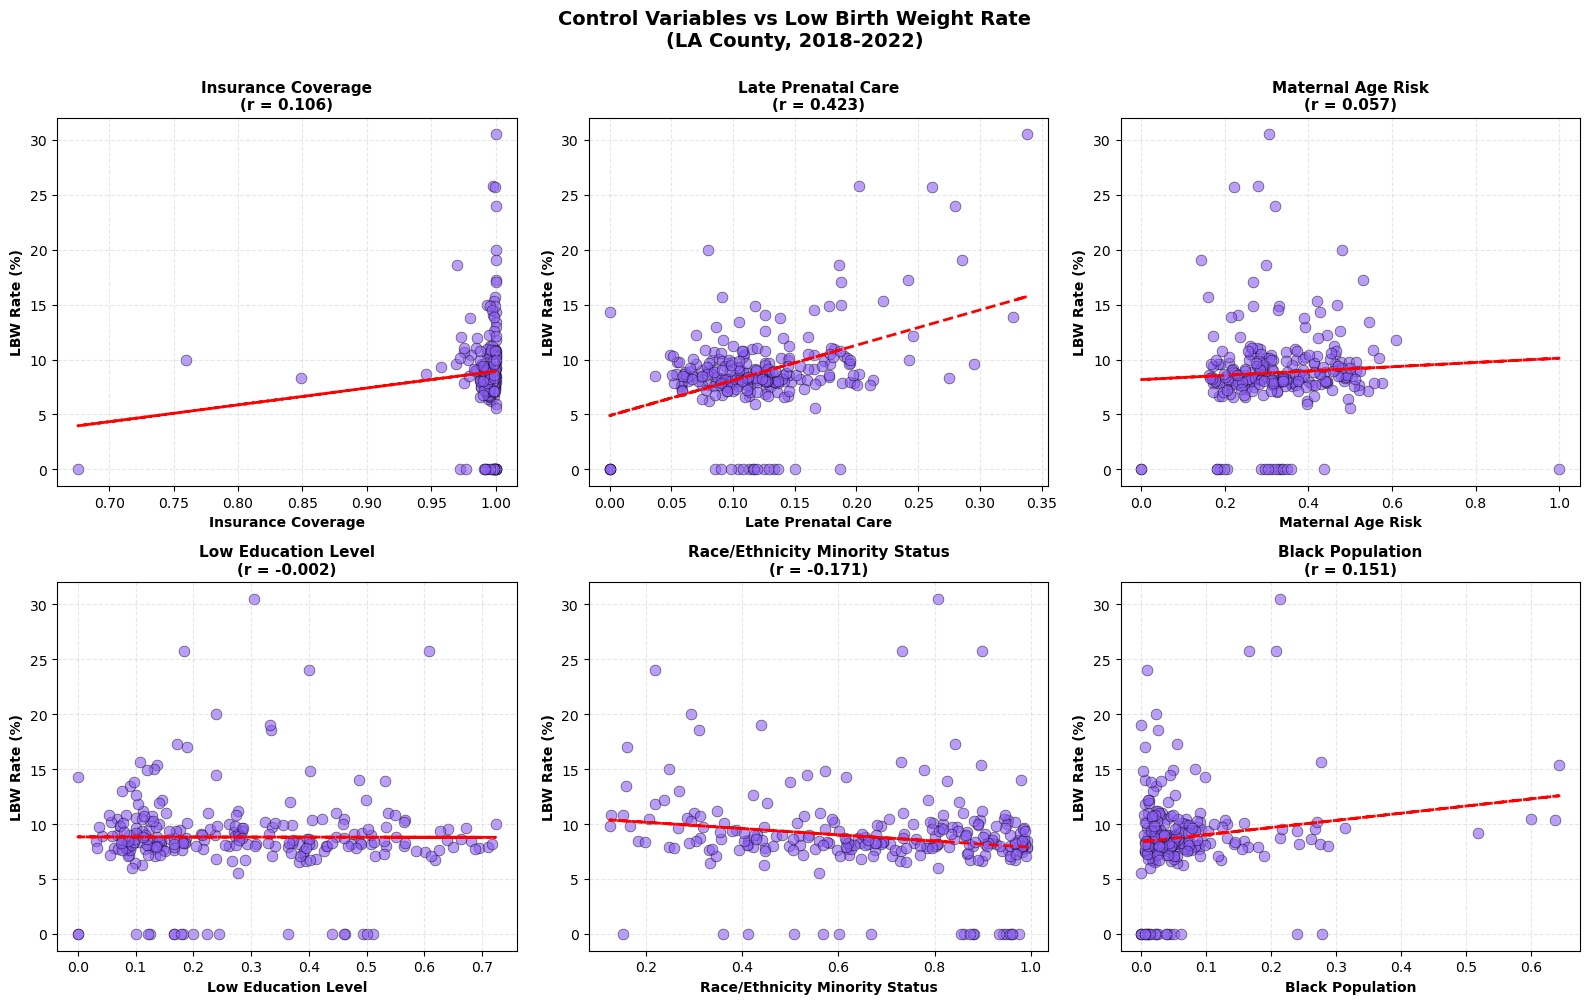


Correlations with LBW_Rate:
Insurance Coverage......................  0.1062
Late Prenatal Care......................  0.4231
Maternal Age Risk.......................  0.0569
Low Education Level..................... -0.0024
Race/Ethnicity Minority Status.......... -0.1714
Black Population........................  0.1509


In [2]:
os.chdir('C:/Users/Demoted/Downloads/datasci/Data_Science_FP')

df = pd.read_csv('Cleaned output data files/final_model_dataset.csv')

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

control_vars = ['insurance_coverage_prop', 'late_prenatal_care_prop', 
                'maternal_age_risk_prop', 'low_education_prop', 
                'race_ethnicity_minority_status', 'black_prop']

titles = ['Insurance Coverage', 'Late Prenatal Care', 'Maternal Age Risk',
          'Low Education Level', 'Race/Ethnicity Minority Status', 'Black Population']

for idx, (ax, var, title) in enumerate(zip(axes.flat, control_vars, titles)):
    
    x = df[var]
    y = df['LBW_Rate']
    
    ax.scatter(x, y, alpha=0.6, s=60, color='#8b5cf6', edgecolors='black', linewidth=0.5)
    
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), "r--", linewidth=2)
    
    correlation = x.corr(y)
    
    ax.set_xlabel(title, fontsize=10, fontweight='bold')
    ax.set_ylabel('LBW Rate (%)', fontsize=10, fontweight='bold')
    ax.set_title(f'{title}\n(r = {correlation:.3f})', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')

plt.suptitle('Control Variables vs Low Birth Weight Rate\n(LA County, 2018-2022)', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()

os.makedirs('visualizations/visualization_media', exist_ok=True)
plt.savefig('visualizations/visualization_media/viz_06_control_variables_scatter.png', dpi=300, bbox_inches='tight')

print("✓ Visualization 6 saved: visualizations/visualization_media/viz_06_control_variables_scatter.png")

plt.show()

print("\nCorrelations with LBW_Rate:")
for var, title in zip(control_vars, titles):
    corr = df[var].corr(df['LBW_Rate'])
    print(f"{title:.<40} {corr:>7.4f}")